In [1]:
import import_ipynb
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import scipy.misc
from UtilFunction import getNpImage
import math

importing Jupyter notebook from UtilFunction.ipynb


Using TensorFlow backend.


In [65]:
path_verso = 'originale/img10.jpeg'
path_recto = 'gali2.jpeg'
im_verso = getNpImage(path_verso)
im_recto = getNpImage(path_recto)

FileNotFoundError: [Errno 2] No such file or directory: 'gali2.jpeg'

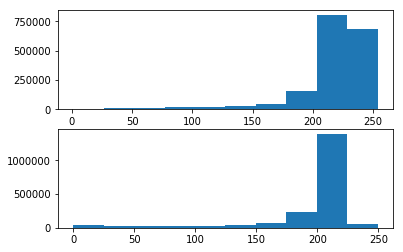

In [66]:
_, h_v , w_v = im_verso.shape
im_verso_s= np.reshape(im_verso,(h_v*w_v))
_, h_r , w_r = im_recto.shape
im_recto_s= np.reshape(im_recto,(h_r*w_r))
plt.figure(1)
plt.subplot(211)
plt.hist(im_verso_s)
plt.subplot(212)
plt.hist(im_recto_s)
plt.show()

In [58]:
def gaussian(x, mid, gap):
    return 255-255*math.exp((-1/2)*((x-mid)/gap)**2)

In [59]:
b_filter_v = np.empty(h_v*w_v)
f_filter_v = np.empty(h_v*w_v)
for i in range(h_v*w_v):    
    b_filter_v[i]=gaussian(im_verso_s[i],150,20)
for j in range(h_v*w_v):
    f_filter_v[j]=gaussian(im_verso_s[j],10,40)

[165.63364785 130.60103368 151.73321844 ... 255.         255.
 254.99990646]


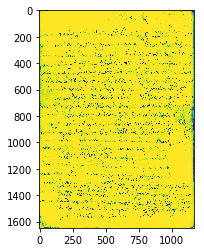

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """


In [60]:
bleed_v = np.reshape(b_filter_v,(h_v,w_v))
print(b_filter_v)
plt.imshow(bleed_v)
plt.show()
scipy.misc.imsave('bleedv.jpg',bleed_v)

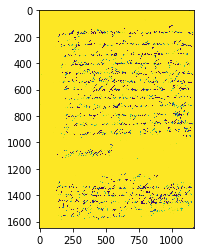

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  after removing the cwd from sys.path.


In [61]:
foreground_v = np.reshape(f_filter_v,(h_v,w_v))
plt.imshow(foreground_v)
plt.show()
scipy.misc.imsave('foregroundv.jpg',foreground_v)

In [5]:
import os, os.path
list_dataset = os.listdir('originale')
for elemento in list_dataset:
    path = os.path.join('originale',elemento)
    im = getNpImage(path)
    _, h , w = im.shape
    im_v= np.reshape(im,(h*w))
    filter_v = np.empty(h*w)
    for i in range(h*w):    
        filter_v[i]=gaussian(im_v[i],20,60)
    im_filter = np.reshape(filter_v,(h,w))
    dest = os.path.join('pulite',elemento)
    scipy.misc.imsave(dest,im_filter)    

NameError: name 'gaussian' is not defined

(array([3.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        7.0000e+00, 1.7000e+01, 2.9000e+01, 5.6000e+01, 1.3300e+02,
        3.5000e+02, 6.6900e+02, 1.2560e+03, 6.8600e+02, 2.4160e+03,
        3.8150e+03, 5.5310e+03, 7.2430e+03, 8.7240e+03, 1.0187e+04,
        1.0631e+04, 1.1243e+04, 1.0863e+04, 1.0076e+04, 7.8610e+03,
        7.2420e+03, 5.8060e+03, 4.4740e+03, 3.3140e+03, 2.6530e+03,
        1.7830e+03, 1.4950e+03, 1.2770e+03, 1.0470e+03, 8.9300e+02,
        9.4000e+02, 8.5000e+02, 9.3400e+02, 9.1800e+02, 9.9500e+02,
        8.9300e+02, 9.6100e+02, 1.0640e+03, 1.0590e+03, 1.0540e+03,
        1.1770e+03, 1.1040e+03, 1.1710e+03, 1.1070e+03, 1.1930e+03,
        1.2200e+03, 1.1140e+03, 1.0670e+03, 1.0910e+03, 9.6900e+02,
        1.0340e+03, 8.7000e+02, 1.0720e+03, 1.0060e+03, 1.0450e+03,
        9.5800e+02, 8.9200e+02, 7.8500e+02, 9.5800e+02, 8.8600e+02,
        9.0700e+02, 9.1600e+02, 9.4700e+02, 9.7400e+02, 9.3200e+02,
        9.0800e+02, 8.9200e+02, 9.4200e+02, 8.67

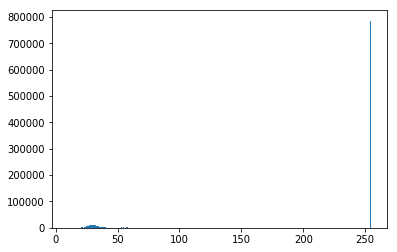

In [26]:
path = 'img1.jpeg'
im = getNpImage(path)

_, h , w = im.shape
im_s= np.reshape(im,(h*w))
his = np.histogram(im_s, bins= 255)
greys= his[0]

for i in range(dim):
    if(im_s[i]>130):
        im_s[i]=255
        
plt.hist(im_s,bins=255)        

In [27]:
new_greys = np.empty(256)
dim =h*w
for i in range(256):
    new_greys[i]=((255)/dim)*np.sum(greys[0:i])
    #new_greys[i]=255*(greys[i]-20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


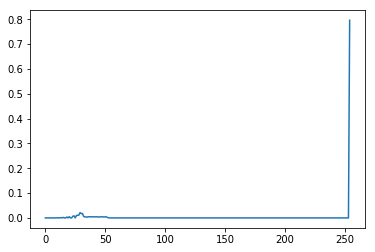

In [28]:
im2_s = np.empty(dim)
for i in range(dim):
    g = int(im_s[i])  
    gray = new_greys[g]
    #if im_s[i]>80:        
       # im2_s[i]= 255*(im_s[i]-20)/100
   # else:
       # im2_s[i]= im_s[i]
    im2_s[i]=gray
his2 = np.histogram(im2_s, bins= 255, density= True) 
plt.plot(his2[0])



equalized = np.reshape(im2_s,(h,w))   

        
scipy.misc.imsave('equalized.png',equalized) 
